In this part, we will do the following:

- How to cause an exception to occur
- How to recover when an exception has occurred
- How to handle different exception types in different ways
- Cleaning up when an exception has occurred
- Creating new types of exception
- Using the exception syntax for flow control

__Raising Exceptions__

Error and Exceptions are used interchangeably. They are python objects(classes). All Exceptions in python have a common class called the __BaseException__. Also, the built-in common errors/exceptions extend the capapbilities of the _BaseException_ __superclass__.

- Lets look atvan example that adds item to a list only if they are even

In [1]:
class EvenOnly(list):
    def append(self, integer):
        if not isinstance(integer, int):
            raise TypeError('Only integer can be added')
            
        if integer % 2:
            raise ValueError("Only even numbers can be added")
            
        super().append(integer)

- Lets test the class to be ssure its printing out meaningful output

In [2]:
e = EvenOnly()
print(e.append('a string'))

TypeError: Only integer can be added

In [3]:
print(e.append(3))

ValueError: Only even numbers can be added

In [4]:
print(e.append(2))

None


In [5]:
e # Successfully appended with Exception

[2]

__The effects of an exception__

In [6]:
# The function below typifies the execution of a program

def no_return():
    print("I am about to raise an Exception")
    raise Exception("This is always raised")
    print('This line will never be executed')
    return "I won't be returned"

In [7]:
# Execute no_return() function

no_return()

I am about to raise an Exception


Exception: This is always raised

- Let us check the execution of the program when a function calls another function with an __Exception__

In [8]:
def call_exceptor():
    print("Call_exceptor starts here...")
    no_return()
    print("an exception was raised")
    print("...so these lines don't run")

In [9]:
call_exceptor()

Call_exceptor starts here...
I am about to raise an Exception


Exception: This is always raised

__Handling Exceptions__

Errors are typicaly handled with __try...Except__ clause. the most basic syntax is shown below:

In [10]:
try:
    no_return()
except:
    print("I caught an exception")
print("Executed after the exception")

I am about to raise an Exception
I caught an exception
Executed after the exception


- What if we have two errorsa Lets say we wanna catch _ZeroDivisionError_ and propagate the other to the console.

In [11]:
def funny_division(divider):
    try:
        return 100 / divider
    except ZeroDivisionError:
        return "Zero is not a good idea"

In [12]:
print(funny_division(0))
print(funny_division(50))
print(funny_division('hello'))

Zero is not a good idea
2.0


TypeError: unsupported operand type(s) for /: 'int' and 'str'

- Handling 2 or more exceptions

In [13]:
def funny_division2(divider):
    try:
        if divider == 13:
            raise ValueError("13 is an unlucky number")
        return 100 / divider
    except (ZeroDivisionError, TypeError):
        return "Enter a number other than zero"

In [14]:
for val in (0, 'hello', 50.0, 13):
    print("Testing {}:".format(val), end= " ")
    print(funny_division2(val))

Testing 0: Enter a number other than zero
Testing hello: Enter a number other than zero
Testing 50.0: 2.0
Testing 13: 

ValueError: 13 is an unlucky number

- If we wanna catch the __ValueError_ above, we can catch it by stacking __Except__ blocks of codes.

In [15]:
def funny_division3(divider):
    try:
        if divider == 13:
            raise ValueError("13 is an unlucky number")
        return 100 / divider
    except ZeroDivisionError:
        return "Enter a number other than zero"
    except TypeError:
        return "Enter a numerical value"
    except ValueError:
        print("No, No, not 13!")
        raise

- The last line re-raises the _ValueError_ error. So after outputing __No, No, not 13!__, Ut will raise the exception again. We will still get original trace stack trace on the console

In [16]:
for val in (0, 'hello', 50.0, 13):
    print("Testing {}:".format(val), end= " ")
    print(funny_division3(val))

Testing 0: Enter a number other than zero
Testing hello: Enter a numerical value
Testing 50.0: 2.0
Testing 13: No, No, not 13!


ValueError: 13 is an unlucky number

- If we catch _Exception_ before we catch the _TypeError_. Then only the exception handler will be executed, because _TypeError_ is an _Exception_ by inheritance.

- For most real cases, we have to catch _Exception_ after catching all specific exceptions and handle the general case there.

_The syntax for capturing an exception as a variable uses the as __keyword___

In [17]:
try:
    raise ValueError("This is an argument")
except ValueError as e:
    print("The exception arguments were", e.args)

The exception arguments were ('This is an argument',)


The above outputs the string *arg* passed to the ValueError

- Lets also get to know how to specify code that should be executed __only__ if an exception does __not__ occur

In [18]:
import random
some_exceptions = [ValueError, TypeError, IndexError, None]

try:
    choice = random.choice(some_exceptions)
    print("raising {}".format(choice))
    if choice:
        raise choice("An error")
except ValueError:
    print("Caught a ValueError")
except TypeError:
    print("Caught a TypeError")
except Exception as e:
    print("Caught some other error: {}".format(e.__class__.__name__))
    
else:
    print("This code called if there is not exception")
finally:
    print("This cleanup code is always called")

raising None
This code called if there is not exception
This cleanup code is always called


- for the above __try...except...else...finally__ code block. It was observed that the __print__ statement in the _finally_ clause is always executed. This is extremely useful for performing certain tasks after our code has finished running. Examples are shown below:
    - Cleaning up an open database connection
    - Closing an open file
    - Sending a closing handshake over the network
    
we can afford to omit __except, else,__ and __finally__ clauses after a __try__ block. __except__ clauses come first and then the __else__ clause with the __finally__ clause at the end.

__The exception hierarchy__

Most _Exceptions_ inherit from Exception class but not all inherit from Exception which inherits from BaseException directly. Infact all exceptions extend teh BaseException class.

There are 2 key built-in exception classes, _SystemExit_ and _KeyboardInterrupt_ that derive from _BaseException_. 

_SystemExit_ is raised whenever a program naturally exits. tpically because we called_sys.exit_ function somewhere in our code. It could clicking the Close button on a window, user selecting an exit menu or entering a command to shutdown a server. we generally don't need to handle it explicitly
because cleanup code can happen inside a _finally_ clause.

If _SystemExit_ is handled, exception is usually re-raised since catching it would stop the program from exiting. usually, if we wanna handle _SystemExit_ because we wanna do something with it or are anticipating it directly. We espespecially dont want it to be accidentally caught in generic clauses that catch all normal exceptions. This is why it derives dorectlt from BaseException

_KeyboardInterrupt_ is common in command-line programs. It is thrown when the user explicitly interrupts program execution with OS-dependent key combinations. Its a standard way to terminate the program. Like _SystemExit_ i, it should also clean codes(tasks) in the _finally_ clause.

___Class diagram that fully illustrates the hierarchy___

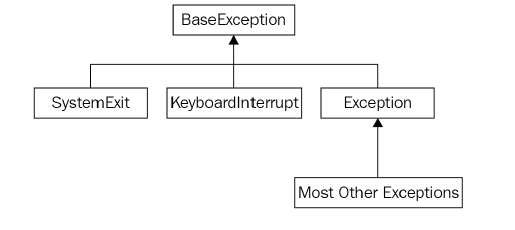

__Defining our own exceptions__

Most times we realise that we want to raise exception but we cant based on the vailable exceptions in the BaseException Superclass. Luckily, it is trivial to create a custom exception for one's purposes. For practical purposes, Most of the custom exceptions usually inherit from the _Exception_ class. It's important to note that there are'nt many use cases for inheriting from the _BaseException_ superclass.

In [19]:
# Here is a simple exception we might use in a banking application

class InvalidWithdrawal(Exception):
    pass

In [20]:
raise InvalidWithdrawal("You don't have $50 in your account")

InvalidWithdrawal: You don't have $50 in your account

The Exception.__init__ method is designed to accept any arguments and store them as a tuple in an __attribute__ named __args__.This makes exceptions easier to define without needing to override __init__.

_Here is an exception whose initializer accepts current balance and the anount the user wanted to withdraw. In addition, it adds a method to calculate how overdrawn the request was_

In [21]:
class InvalidWithdrawal(Exception):
    def __init__(self, balance, amount):
        super().__init__(f"account doesn't have ${amount}")
        self.amount = amount
        self.balance = balance
        
    def overage(self):
        return self.amount - self.balance
    

In [22]:
raise InvalidWithdrawal(25, 50)

InvalidWithdrawal: account doesn't have $50

- Handling the InvalidWithdrawal exception

In [23]:
try:
    raise InvalidWithdrawal(25, 50)
except InvalidWithdrawal as e:
    print("I'm sorry, but your withdrawal is more than"
          f" your balance by ${e.overage()}")

I'm sorry, but your withdrawal is more than your balance by $25


- Examples of other custom functions

In [24]:
def divide_with_exception(number, divisor):
    try:
        print(f"{number} / {divisor} = {number / divisor}")
    except ZeroDivisionError:
        print("You can't divide by zero")
        
def divide_with_if(number, divisor):
    if divisor == 0:
        print("You can't divide by zero")
    else:
        print(f"{number} / {divisor} = {number / divisor}")
            

- Lets look at an inventory application that features the following
    - When purchase is made, the program can either be available or out-of-stock
    - We also wanna lock each item so it is not purchased/ taken by someone else

In [25]:
class Inventory:
    def lock(self, item_type):
        """Select the type of item that is going to
be manipulated. This method will lock the
item so nobody else can manipulate the
inventory until it's returned. This prevents
selling the same item to two different
customers."""
        pass
    
    def unlock(self, item_type):
        """Release the given type so that other
customers can access it."""
        
    def purchase(self, item_type):
        """If the item is not locked, raise an
exception. If the item_type does not exist,
raise an exception. If the item is currently
out of stock, raise an exception. If the item
is available, subtract one item and return
the number of items left."""
        pass
        

- Let's use python robust exception handling method to consider different branches, depending on how purchase was made:

In [26]:
item_type = "widget"

inv = Inventory()

inv.lock(item_type)
try:
    num_left = inv.purchase(item_type)
except InvalidItemType:
    print("Sorry we don't sell {}".format(item_type))
except OutOfStock:
    print("Sorry, that item is out of stock.")
else:
    print(f"Purchase complete. There are {num_left} {item_type}s left")
finally:
    inv.unlock(item_type)

Purchase complete. There are None widgets left


__Case study__

- Design simple central authentication and authorization system.
- We can have __User__ class for storing username and encrypted password
- __Authenticator__ class that handles user management and logging in or out 
- __Authorizor__ that deals with permissions and checking whether a user can perform an activity. 

- defining 3 exception classes __AuthException__, __UsernameAlreadyExists__(To avoid adding a user with an existing username), __PasswordTooShort__(weal password)

In [10]:
import hashlib

In [28]:
hashlib?

In [1]:
class User:
    def __init__(self, username, password):
        """Create a new user object. The password will be encrypted 
        before storing."""
        self.username = username
        self.password = self._encrypt_pw(password)
        self.is_logged_in = False
        
    def _encrypt_pw(self, password):
        """Encrypt the password with the username and return
        the sha digest."""
        hash_string = self.username + password
        hash_string = hash_string.encode("utf8")
        return hashlib.sha256(hash_string).hexdigest()
    
    def check_password(self, password):
        """Return True if the password is valid for this user,
        false otherwise."""
        encrypted = self._encrypt_pw(password)
        return encrypted == self.password

In [2]:
class AuthException(Exception):
    def __init__(self, username, user=None):
        super().__init__(username, user)
        self.username = username
        self.user = user
        
class UsernameAlreadyExists(AuthException):
    pass

class PasswordTooShort(AuthException):
    pass

- Create  an __Authenticator__ class for mapping user objects to username and for adding users who has met two conditions(strong password, not-previously-exisisting-user)

In [3]:
class Authenticator:
    def __init__(self):
        """Construct an authenticator to manage users logging in and out."""
        self.users = {}
        
    def add_user(self, username, password):
        if username in self.users:
            raise UsernameAlreadyExists(username)
        if len(password) < 6:
            raise Password
        self.users[username] = User(username, password)
        
    # Let's define login method to our authenticator class that raises 
    # InvalidUsername and InvalidPassword exceptions
    
    def login(self, username, password):
        try:
            user = self.users[username]
        except KeyError:
            raise InvalidUsername(username)
            
        if not user.check_password(password):
            raise InvalidPassword(username, user)
            
        user.is_logged_in = True
        
        return True
    
    def is_logged_in(self, username):
        if username in self.users:
            return self.users[username].is_logged_in
        return False

- We add new exceptions to capture if username doe's not exist or password does not match

In [4]:
class InvalidUsername(AuthException):
    pass

class InvalidPassword(AuthException):
    pass

- Let us create an __Authorizor__ class should not permit user access to a permission if they are not logged in, so they need reference to a specific authenticator.

In [5]:
authenticator = Authenticator()

In [6]:
class Authorizor:
    def __init__(self, authenticator):
        self.authenticator = authenticator
        self.permissions = {}
        
    # Add methods to add new permissions and to set up which users are 
    # associated with each permission
    
    def add_permission(self, perm_name):
        '''Create a new permission that users
can be added to'''
        try:
            perm_set = self.permissions[perm_name]
        except KeyError:
            self.permissions[perm_name] = set()
        else:
            raise PermissionError('Permission Exists')
            
    def permit_user(self, perm_name, username):
        '''Grant the given permission to the user'''
        try:
            perm_set = self.permissions[perm_name]
        except KeyError:
            raise PermissionError("Permission does not exist")
        else:
            if username not in self.authenticator.users:
                raise InvalidUsername(username)
            perm_set.add(username)
            
    def check_permission(self, perm_name, username):
        if not self.authenticator.is_logged_in(username):
            raise NotLoggedInError(username)
        try:
            perm_set = self.permissions[perm_name]
        except KeyError:
            raise PermissionError("Permission does not exist")
        else:
            if username not in perm_set:
                raise NotPermittedError(username)
            else:
                return True

In [7]:
# 
class PermissionError(Exception):
    pass

class NotLoggedInError(AuthException):
    pass

class NotPermittedError(AuthException):
    pass

In [8]:
authorizor = Authorizor(authenticator)

- This is our basic authentication/authorization system. We can test the system at the Python prompt, checking to see whether a user, _joe_ , is permitted to do tasks in the _paint_ department.

In [78]:
authenticator.add_user("joe", "joepassword")

In [79]:
authorizor.add_permission("paint")

In [80]:
authorizor.check_permission("paint", "joe")

NotLoggedInError: ('joe', None)

In [81]:
authenticator.is_logged_in("joe")

False

In [82]:
authenticator.users

{'joe': <__main__.User at 0x14fafc46bc8>}

In [83]:
authenticator.login("joe", "joepassword")

True

In [84]:
authorizor.check_permission("paint", "joe")

NotPermittedError: ('joe', None)

In [85]:
authorizor.check_permission("mix", "joe")

PermissionError: Permission does not exist

In [87]:
authorizor.permit_user("mix", "joe")

PermissionError: Permission does not exist

In [89]:
authorizor.permit_user("paint", "joe")

In [90]:
authorizor.check_permission("paint", "joe")

True

While verbose, the preceding output shows all of our code and most of our
exceptions in action, but to really understand the API we've defined, we
should write some exception handling code that actually uses it. Here's a
basic menu interface that allows certain users to change or test a program:

In [11]:
authenticator.add_user("joe", "joepassword")
authorizor.add_permission("test program")
authorizor.add_permission("change program")
authorizor.permit_user("test program", "joe")

In [20]:
class Editor:
    def __init__(self):
        self.username = None
        self.menu_map = {
            "login": self.login,
            "test": self.test,
            "change": self.change,
            "quit": self.quit,
        }
        
    def login(self):
        logged_in = False
        while not logged_in:
            username = input("username: ")
            password = input("password: ")
            try:
                logged_in = authenticator.login(username, password)
            except InvalidUsername:
                print("Sorry, that username does not exist")
            except InvalidPassword:
                print("Sorry, incorrect password")
            else:
                self.username = username
                
    def is_permitted(self, permission):
        try:
            authorizor.check_permission(permission, self.username)
        except NotLoggedInError as e:
            print("{} is not logged in".format(e.username))
            return False
        except NotPermittedError as e:
            print("{} cannot {}".format(e.username, permission))
            return False
        else: 
            return True
        
    def test(self):
        if self.is_permitted("test program"):
            print("Testing program now...")
            
    def change(self):
        if self.is_permitted("change_program"):
            print("Changing program now")
            
    def quit(self):
        raise SystemExit()
        
    def menu(self):
        try:
            answer = ""
            while True:
                print(
                """
Please enter a command:
\tlogin\tLogin
\ttest\tTest the program
\tchange\tChange the program
\tquit\tQuit
""")
                answer = input("enter a command: ").lower()
                try:
                    func = self.menu_map[answer]
                except KeyError:
                    print("{} is not a valid option".format(answer))
                else:
                    func()
        finally:
            print("Thank for testing the authorization/authentication classes")                  